# Image Captioning Project
### By Mohammad Hossein Miri

The goal of this project is creating and training a model which allows us to give it an image and then returns back a caption which describes the image.


Techs used in this project:
* PyTorch
* Transformers
* HuggingFace Hub
* Matplotlib

<br>

## A short description of how this code works

This code skips the process of training **CNN** and uses **transfer learning** to implement the **CNN**.
Also a **hugging face** model is used in order to get **Encoder-Decoder architecture**.

<br>
Also according to the fact that the project is based and running in **Google Colab**, the test images are uploaded to **Google Drive**. So mounting the **Google Drive** into the Notebook is necessary.

## Model I used from Hugging Face
[vit-gpt2-image-captioning](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)

## Model Architecture
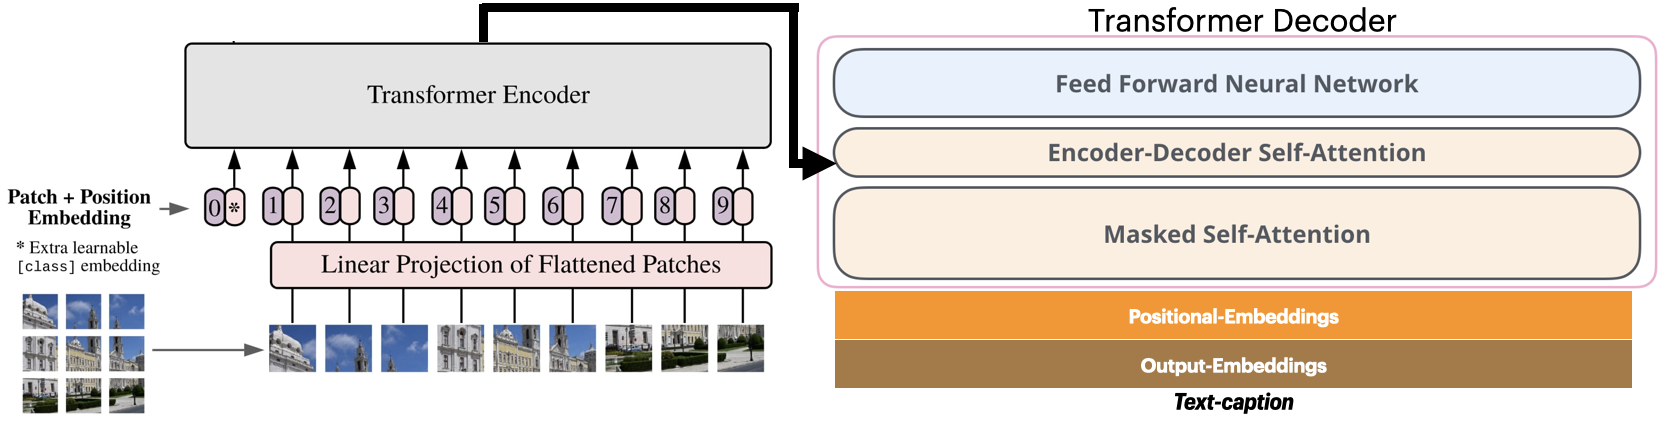



<br>
<br>
<br>
<br>
<br>



# Step 1. Required Libraries
In this step, we gotta install some packages using `pip`. In order to run system commands in **IPython Notebooks** (**Jupyter**, **Colab** and etc.), you can use **Exclamation Mark** (`!`).

Packages to install:
* `transformers`
* `mtranslate`
* `plotfa`

In [2]:
%pip install transformers
%pip install mtranslate
%pip install plotfa

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 7.5/7.5 MB 251.3 kB/s eta 0:00:00
     ------------------------------------ 293.3/293.3 kB 566.1 kB/s eta 0:00:00
     ------------------------------------ 470.4/470.4 kB 453.3 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 279.3 kB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00
  Using cached plotfa-0.0.5-py3-none-any.whl (16 kB)
  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.




<br>
<br>
<br>
<br>
<br>



# Step 2. Importing Required Libraries
In this step, what we're going to do is importing the libraries that we need, in order to make our model and then use it.

In [1]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from mtranslate import translate

from plotfa import fa
import plotfa

import os

c:\Users\Mohammad\miniconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




<br>
<br>
<br>
<br>
<br>



# Step 3. Initalizing Model
In this step, we use the **Hugging Face** and **CNN** model I've metioned earlier

In [2]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

KeyboardInterrupt: 



<br>
<br>
<br>
<br>
<br>



# Step 4. GPU acceleration
In this step we should do several things:
<br>
1. Make sure that **CUDA** is installed and **GPU** is ready to use, using `nvidia-smi`
2. Defining `device` and making it to be **GPU** if it is available or **CPU** if it's not
3. Moving our defined `model` to `device` so that it uses **GPU** if it is available

In [13]:
!nvidia-smi

Sat Jul  8 23:02:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |   2107MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur



<br>
<br>
<br>
<br>
<br>



# Step 5. Defining Hyperpararmeters
Now it's time to define and assign necessary **Hyperparameters**

In [15]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}



<br>
<br>
<br>
<br>
<br>



# Step 6. Making a Function Which Makes Predictions
We're getting closer to the end. So now it's time to make our final and clear function which takes the **path of the target image** and then returns the **caption** which our model predicted.
<br>
What we're doing in this step:
1. Getting **image path** as the input of the function
2. Opening the image using `Image` in `PIL`
3. Converting the image to **RGB** color mode if it's not already
4. **Extracting features** and **pixel values** from image and getting the result as a **tensor**
5. Using the **model** to **predict**/**generate** a **caption** for the image
6. using `tokenizer` to **convert**/**decode** the **generated/predicted caption** into **alphabets**
7. Returning the result

In [16]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds



<br>
<br>
<br>
<br>
<br>



# Step 7. Creating the Translator
In this step, I've made a function called `translate` which takes an input and then returns the translated input from **English** to **Persian**.

In [17]:
def translate_to_persian(sentence):
    translation = translate(sentence, 'fa', 'en')
    return translation



<br>
<br>
<br>
<br>
<br>



# Step 8. Final Test
Now we're testing the function from the previous step to see if it can make predictions without any problem

In [23]:
import matplotlib.font_manager as fm

font_path = "./drive/MyDrive/Colab Notebooks/image_captioning/IRANSansX-Bold.ttf"

custom_font = fm.FontProperties(fname=font_path, size=15)

base_folder = "/content/drive/MyDrive/Colab Notebooks/image_captioning/test_images"

img_files = [os.path.join(base_folder, f) for f in os.listdir(base_folder)]

num_rows = len(img_files) // 2 + len(img_files) % 2

fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(13, 30))

for i, ax in enumerate(axs.flat):
    if i < len(img_files):
        img_file = img_files[i]
        img = Image.open(img_file)

        ax.imshow(img)

        title = predict_step([img_file])[0]
        title = title + "\n" + translate_to_persian(title)
        title = fa(title)

        plotfa.prettify()

        ax.set_title(title, fontproperties=custom_font)

        for spine in ax.spines.values():
            spine.set_edgecolor('blue')
            spine.set_linewidth(1.5)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.4, wspace=0.4)

plt.savefig('/content/drive/MyDrive/result.png', dpi=300, format='png', bbox_inches='tight', pad_inches=0)

plt.show()

Output hidden; open in https://colab.research.google.com to view.